In [1]:
import tensorflow as tf
from data import DataLoaderCifar
import keras
import datetime

2025-06-06 16:49:14.196303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749221354.228076    5364 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749221354.238385    5364 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749221354.277554    5364 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749221354.277573    5364 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749221354.277575    5364 computation_placer.cc:177] computation placer alr

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
loader = DataLoaderCifar(validation_dataset_size=5000, mini_batch_size=128)

## Check Data Dimensions

In [3]:
train_dataset = loader.train_dataset
for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    print(x_batch_train.shape)
    print(y_batch_train.shape)
    break

(128, 32, 32, 3)
(128, 1)


2025-06-05 13:43:02.985642: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [4]:
valid_dataset = loader.valid_dataset
for step, (x_batch_valid, y_batch_valid) in enumerate(valid_dataset):
    print(x_batch_valid.shape)
    print(y_batch_valid.shape)
    break

(128, 32, 32, 3)
(128, 1)


2025-06-05 13:43:05.359265: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


# Dense Evaluation

In [19]:
# Simple Model without regularization
def NewDenseModelCifar(depth, width):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
    
    for i in range(depth):
        model.add(keras.layers.Dense(width, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    return model

# Testing Width
Here we train models with different width and `depth = 1`.
We set a high enough amount of epochs and use early stopping on the training loss
to measure when a model is not able to reduce it any further.

In [ ]:
log_path = f'logs/width/5'
model = NewDenseModelCifar(depth=1, width=512)
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ],
)
parm_count = str(model.count_params())
print(f'model with p={parm_count}')

model.summary()
    
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)
earlystopping_callback = keras.callbacks.EarlyStopping(monitor='loss',patience=3) # stop if the model can not reduce the training loss further

model.fit(
    loader.train_dataset,
    epochs=200,
    validation_data=loader.valid_dataset,
    callbacks = [tensorboard_callback, earlystopping_callback]
)
#model.save()

model with p=3157002


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,157,002 (12.04 MB)

 Trainable params: 3,157,002 (12.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-05-31 14:31:46.805005: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_107', 72 bytes spill stores, 72 bytes spill loads

2025-05-31 14:31:46.880183: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_107', 420 bytes spill stores, 420 bytes spill loads

E0000 00:00:1748694707.094227    3237 buffer_comparator.cc:157] Difference at 134: 472.591, expected 527.828
E0000 00:00:1748694707.094282    3237 buffer_comparator.cc:157] Difference at 160: 1.48627, expected 506.263
E0000 00:00:1748694707.094290    3237 buffer_comparator.cc:157] Difference at 161: 1.65882, expected 527.144
E0000 00:00:1748694707.094293    3237 buffer_comparator.cc:157] Difference at 162: 2.58824, expected 510.75
E0000 00:00:1748694707.094296    3237 buffer_comparator.cc:157] Difference at 163: 1.60784, exp

348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5588 - sparse_categorical_accuracy: 0.2434

2025-05-31 14:31:49.367071: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_107', 72 bytes spill stores, 72 bytes spill loads

2025-05-31 14:31:49.480107: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_107', 420 bytes spill stores, 420 bytes spill loads

E0000 00:00:1748694709.661550    3239 buffer_comparator.cc:157] Difference at 160: 0.152941, expected 0.498814
E0000 00:00:1748694709.661611    3239 buffer_comparator.cc:157] Difference at 161: 0.0784314, expected 0.448453
E0000 00:00:1748694709.661620    3239 buffer_comparator.cc:157] Difference at 162: 0.101961, expected 0.461146
E0000 00:00:1748694709.661623    3239 buffer_comparator.cc:157] Difference at 163: 0.141176, expected 0.614324
E0000 00:00:1748694709.661626    3239 buffer_comparator.cc:157] Difference at 164: 0.

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5531 - sparse_categorical_accuracy: 0.2440

E0000 00:00:1748694710.907286    3238 buffer_comparator.cc:157] Difference at 7: 458.155, expected 512.297
E0000 00:00:1748694710.907331    3238 buffer_comparator.cc:157] Difference at 27: 462.24, expected 514.587
E0000 00:00:1748694710.907340    3238 buffer_comparator.cc:157] Difference at 37: 458.431, expected 513.219
2025-05-31 14:31:50.907350: E external/local_xla/xla/service/gpu/autotuning/gemm_fusion_autotuner.cc:987] Results do not match the reference. This is likely a bug/unexpected loss of precision.
E0000 00:00:1748694710.908770    3238 buffer_comparator.cc:157] Difference at 5: 599.737, expected 511.192
E0000 00:00:1748694710.908798    3238 buffer_comparator.cc:157] Difference at 8: 608.787, expected 493.959
E0000 00:00:1748694710.908806    3238 buffer_comparator.cc:157] Difference at 12: 565.24, expected 501.434
E0000 00:00:1748694710.908809    3238 buffer_comparator.cc:157] Difference at 15: 600.974, expected 508.861
E0000 00:00:1748694710.908812    3238 buffer_comparator.

352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 2.5517 - sparse_categorical_accuracy: 0.2442 - val_loss: 1.8016 - val_sparse_categorical_accuracy: 0.3592
Epoch 2/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7927 - sparse_categorical_accuracy: 0.3608 - val_loss: 1.7377 - val_sparse_categorical_accuracy: 0.3732
Epoch 3/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7054 - sparse_categorical_accuracy: 0.3971 - val_loss: 1.6854 - val_sparse_categorical_accuracy: 0.4006
Epoch 4/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6530 - sparse_categorical_accuracy: 0.4162 - val_loss: 1.6098 - val_sparse_categorical_accuracy: 0.4262
Epoch 5/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.6034 - sparse_categorical_accuracy: 0.4277 - val_loss: 1.6451 - val_sparse_categorical_accuracy: 0.4136
Epoch 6/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5861 - sparse_categorical_accuracy: 0.4403 - val_loss: 1.5864 - val_sparse_categorical_accuracy: 0.4472
Epoch 7/2

Here are the results of different widths:
```
128, in log 1
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3743 - sparse_categorical_accuracy: 0.5128 - val_loss: 1.5221 - val_sparse_categorical_accuracy: 0.4724
```
---
```
256, in log 2, spikes back up to 2.5779!
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6420 - sparse_categorical_accuracy: 0.4185 - val_loss: 1.9133 - val_sparse_categorical_accuracy: 0.3140
```
---
```
256, in log 3, spikes back 2.5936!
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.8345 - sparse_categorical_accuracy: 0.3299 - val_loss: 2.0843 - val_sparse_categorical_accuracy: 0.2202
```
---
```
512, in log 4
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9481 - sparse_categorical_accuracy: 0.6614 - val_loss: 1.6258 - val_sparse_categorical_accuracy: 0.4992
```
---
```
1024, in log 5
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1798 - sparse_categorical_accuracy: 0.5813 - val_loss: 7.6802 - val_sparse_categorical_accuracy: 0.4754
```
---
Lowest loss is achieved with 512 before early stopping it also has the best validation accuracy.
512 seems to be a good compromise we will continue to use this in further models.

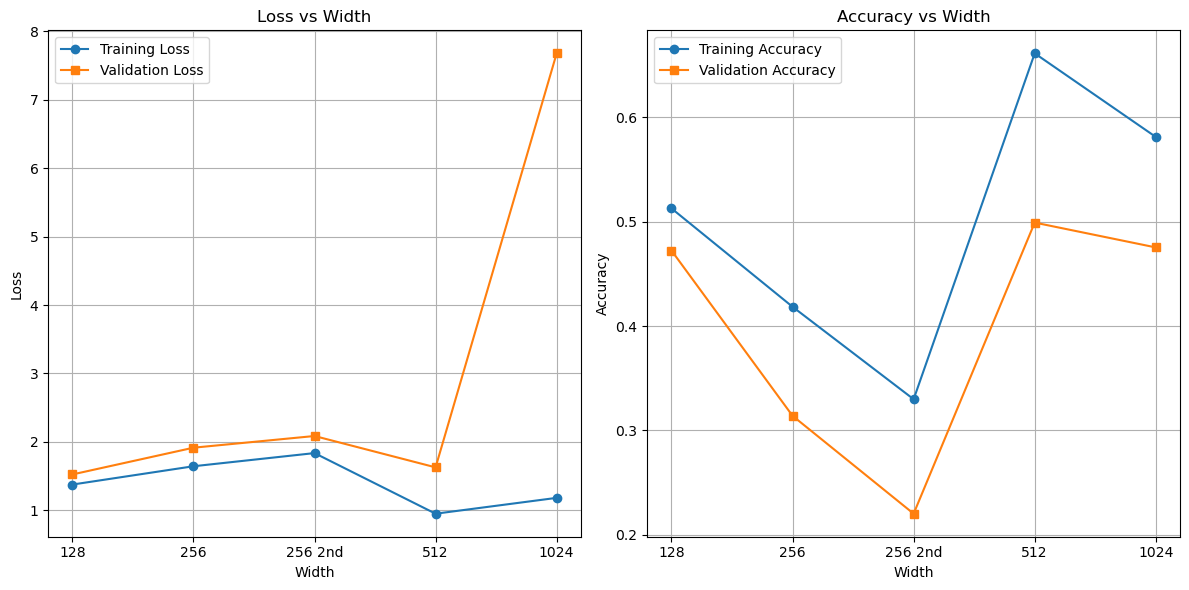

In [ ]:
import matplotlib.pyplot as plt

# Width values used as x-axis (each one represents a configuration)
widths = [128, 256, 256, 512, 1024]

# Corresponding training and validation metrics
train_loss = [1.3743, 1.6420, 1.8345, 0.9481, 1.1798]
val_loss   = [1.5221, 1.9133, 2.0843, 1.6258, 7.6802]

train_acc = [0.5128, 0.4185, 0.3299, 0.6614, 0.5813]
val_acc   = [0.4724, 0.3140, 0.2202, 0.4992, 0.4754]

labels = ['128', '256', '256 2nd', '512', '1024']

plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(labels, train_loss, label='Training Loss', marker='o')
plt.plot(labels, val_loss, label='Validation Loss', marker='s')
plt.title('Loss vs Width')
plt.xlabel('Width')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(labels, train_acc, label='Training Accuracy', marker='o')
plt.plot(labels, val_acc, label='Validation Accuracy', marker='s')
plt.title('Accuracy vs Width')
plt.xlabel('Width')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Depth Tests

In [ ]:
log_path = f'logs/depth/20'
model = NewDenseModelCifar(depth=20, width=512)
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ],
)
parm_count = str(model.count_params())
print(f'model with p={parm_count}')

model.summary()
    
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)
earlystopping_callback = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

model.fit(
    loader.train_dataset,
    epochs=200,
    validation_data=loader.valid_dataset,
    callbacks = [tensorboard_callback, earlystopping_callback]
)

model with p=6568970


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_41 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,568,970 (25.06 MB)

 Trainable params: 6,568,970 (25.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
  1/352 ━━━━━━━━━━━━━━━━━━━━ 28:23 5s/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0859

2025-05-31 15:12:17.792399: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 488 bytes spill stores, 488 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 24 bytes spill stores, 24 bytes spill loads



352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3190 - sparse_categorical_accuracy: 0.0979

2025-05-31 15:12:21.289165: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 488 bytes spill stores, 488 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 24 bytes spill stores, 24 bytes spill loads



352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 2.3190 - sparse_categorical_accuracy: 0.0979 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0972
Epoch 2/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0995 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0972
Epoch 3/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1014 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0920
Epoch 4/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1024 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0996
Epoch 5/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0961 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0972
Epoch 6/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0973 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0920
Epoch 

now test depth:
we use the width 512 as assessed from above.
- 1, log 1, 352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9448 - sparse_categorical_accuracy: 0.6660 - val_loss: 1.9839 - val_sparse_categorical_accuracy: 0.4580
- 2, log 2, 352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4801 - sparse_categorical_accuracy: 0.8248 - val_loss: 2.6287 - val_sparse_categorical_accuracy: 0.4858
- 3, log 3, 352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1912 - sparse_categorical_accuracy: 0.9339 - val_loss: 4.0999 - val_sparse_categorical_accuracy: 0.4726
- 4, log 4, 352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2689 - sparse_categorical_accuracy: 0.9081 - val_loss: 4.0175 - val_sparse_categorical_accuracy: 0.4784
- 5, log 5, 352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2083 - sparse_categorical_accuracy: 0.9299 - val_loss: 4.3488 - val_sparse_categorical_accuracy: 0.4582
- 6, log 6, 352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1650 - sparse_categorical_accuracy: 0.9445 - val_loss: 3.6839 - val_sparse_categorical_accuracy: 0.4654
- 7, log 7, 352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1899 - sparse_categorical_accuracy: 0.9344 - val_loss: 3.5324 - val_sparse_categorical_accuracy: 0.4684
- 8, log 8, 352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2374 - sparse_categorical_accuracy: 0.9196 - val_loss: 3.2557 - val_sparse_categorical_accuracy: 0.4732
- 9, log 9, 352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2181 - sparse_categorical_accuracy: 0.9277 - val_loss: 3.7965 - val_sparse_categorical_accuracy: 0.4502
- 10, log 10, 352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2848 - sparse_categorical_accuracy: 0.9049 - val_loss: 2.9121 - val_sparse_categorical_accuracy: 0.4476
- 15, log 15, 352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.6583 - sparse_categorical_accuracy: 0.3917 - val_loss: 1.7290 - val_sparse_categorical_accuracy: 0.3768
- 20, log 20, 352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.0987 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0920

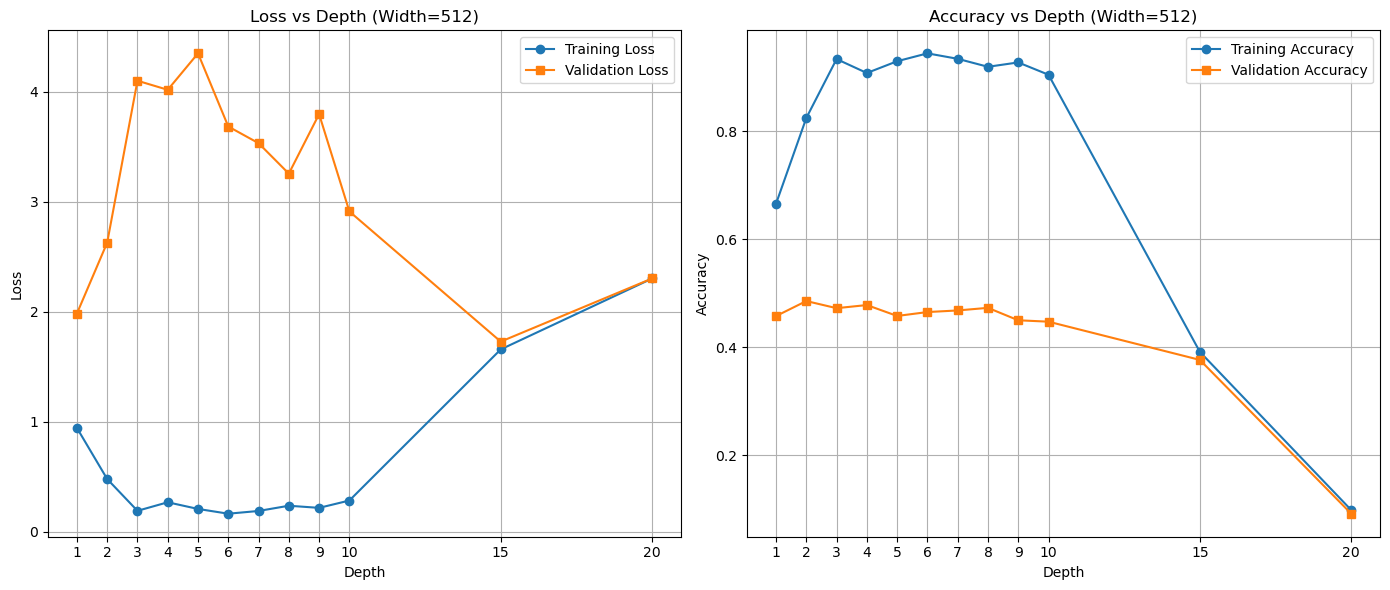

In [ ]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

# Training and validation loss and accuracy
train_loss = [0.9448, 0.4801, 0.1912, 0.2689, 0.2083, 0.1650, 0.1899, 0.2374, 0.2181, 0.2848, 1.6583, 2.3026]
val_loss   = [1.9839, 2.6287, 4.0999, 4.0175, 4.3488, 3.6839, 3.5324, 3.2557, 3.7965, 2.9121, 1.7290, 2.3028]

train_acc  = [0.6660, 0.8248, 0.9339, 0.9081, 0.9299, 0.9445, 0.9344, 0.9196, 0.9277, 0.9049, 0.3917, 0.0987]
val_acc    = [0.4580, 0.4858, 0.4726, 0.4784, 0.4582, 0.4654, 0.4684, 0.4732, 0.4502, 0.4476, 0.3768, 0.0920]

plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(depths, train_loss, label='Training Loss', marker='o')
plt.plot(depths, val_loss, label='Validation Loss', marker='s')
plt.title('Loss vs Depth (Width=512)')
plt.xlabel('Depth')
plt.ylabel('Loss')
plt.xticks(depths)
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(depths, train_acc, label='Training Accuracy', marker='o')
plt.plot(depths, val_acc, label='Validation Accuracy', marker='s')
plt.title('Accuracy vs Depth (Width=512)')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Depth of 10 seems to be resonable since it overfits with low training loss and comperatively low validation loss.
It also has and comperatively high training accuracy. Validation accuraccy is low through all tested depths.
After depth of 10 the training loss increases and the validation loss decreases while both training and validation accuracy tank.

It indeed helps training but does not really improve validation accuracy.

In [38]:

log_path = f'logs/512-20/skip-batchnorm-dropout_01'

dropout = 0.1
width = 512

inputs = keras.layers.Input(shape=(32, 32, 3))
flatten = keras.layers.Flatten()(inputs)

x = keras.layers.Dense(512, activation=None)(flatten) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Concatenate(axis=1)([x, flatten])

# 10

x = keras.layers.Dense(512, activation=None)(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Dense(512, activation=None)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(dropout)(x)
x = keras.layers.Concatenate(axis=1)([x, flatten])

outputs = keras.layers.Dense(10, activation="softmax")(x)

model = keras.models.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ],
)

model.summary()
    
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)

model.fit(
    loader.train_dataset,
    epochs=75,
    validation_data=loader.valid_dataset,
    callbacks = [tensorboard_callback]
)

Model: "functional_536"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 3072)      │          0 │ input_layer_24[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_308 (Dense)   │ (None, 512)       │  1,573,376 │ flatten_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_308[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_144 (ReLU)    │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_116         │ (None, 512)       │          0 │ re_lu_144[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_309 (Dense)   │ (None, 512)       │    262,656 │ dropout_116[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_309[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_145 (ReLU)    │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_117         │ (None, 512)       │          0 │ re_lu_145[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_310 (Dense)   │ (None, 512)       │    262,656 │ dropout_117[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_310[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_146 (ReLU)    │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_118         │ (None, 512)       │          0 │ re_lu_146[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_311 (Dense)   │ (None, 512)       │    262,656 │ dropout_118[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_311[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_147 (ReLU)    │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_119         │ (None, 512)       │          0 │ re_lu_147[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_312 (Dense)   │ (None, 512)       │    262,656 │ dropout_119[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_312[0][0] 

 Total params: 8,213,514 (31.33 MB)

 Trainable params: 8,193,034 (31.25 MB)

 Non-trainable params: 20,480 (80.00 KB)

Epoch 1/75


2025-06-04 21:10:51.507545: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13232', 616 bytes spill stores, 520 bytes spill loads

2025-06-04 21:10:51.632199: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13232', 612 bytes spill stores, 524 bytes spill loads

2025-06-04 21:10:51.669578: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13232_0', 4 bytes spill stores, 4 bytes spill loads

2025-06-04 21:10:52.015374: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13232', 716 bytes spill stores, 592 bytes spill loads



348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9938 - sparse_categorical_accuracy: 0.2906

2025-06-04 21:11:04.235919: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10944', 12 bytes spill stores, 12 bytes spill loads

2025-06-04 21:11:04.257191: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10944', 12 bytes spill stores, 12 bytes spill loads

2025-06-04 21:11:04.619183: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10944', 16 bytes spill stores, 16 bytes spill loads

2025-06-04 21:11:05.050359: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11023', 60 bytes spill stores, 60 bytes spill loads

2025-06-04 21:11:05.123997: I extern

352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - loss: 1.9916 - sparse_categorical_accuracy: 0.2914 - val_loss: 2.0382 - val_sparse_categorical_accuracy: 0.3206
Epoch 2/75
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.6512 - sparse_categorical_accuracy: 0.4129 - val_loss: 1.7215 - val_sparse_categorical_accuracy: 0.3758
Epoch 3/75
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.5465 - sparse_categorical_accuracy: 0.4503 - val_loss: 1.7592 - val_sparse_categorical_accuracy: 0.3908
Epoch 4/75
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.4604 - sparse_categorical_accuracy: 0.4825 - val_loss: 1.9064 - val_sparse_categorical_accuracy: 0.3598
Epoch 5/75
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.4066 - sparse_categorical_accuracy: 0.5028 - val_loss: 1.6167 - val_sparse_categorical_accuracy: 0.4436
Epoch 6/75
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.3436 - sparse_categorical_accuracy: 0.5245 - val_loss: 1.7656 - val_sparse_categorical_accuracy: 0.3928
Epoch 7/

# Final Dense Model

In [33]:
dropout_val = 0.3

model = keras.Sequential()
model.add(keras.layers.Input(shape=(32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(dropout_val))

model.add(keras.layers.Dense(2048, activation=None)) # smooth off to 512
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(1024, activation=None)) # smooth off to 512
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))

model.add(keras.layers.Dense(512, activation=None)) # 10x512 layers
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))

model.add(keras.layers.Dense(512, activation=None)) # 10x512 layers
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))
model.add(keras.layers.Dense(512, activation=None))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(dropout_val))

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ],
)
model.save('saved_models/full/model.keras')

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_124         │ (None, 3072)           │        12,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_125         │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_122 (ReLU)                │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_126         │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_123 (ReLU)                │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_127         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_124 (ReLU)                │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_128         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_125 (ReLU)                │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_129         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_126 (ReLU)                │ (None, 512)            │             

 Total params: 13,977,610 (53.32 MB)

 Trainable params: 13,944,842 (53.20 MB)

 Non-trainable params: 32,768 (128.00 KB)

In [ ]:
log_path = f'logs/final/normal-batchnorm-dropout_03_augmentation'
loaded_model = keras.models.load_model("saved_models/full/model.keras")
loaded_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ],
)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "saved_models/cnn/model2.keras",
    save_best_only=True,
    save_weights_only=False,
    monitor='val_sparse_categorical_accuracy'
)

loaded_model.fit(
    loader.train_dataset,
    epochs=70,
    validation_data=loader.valid_dataset,
    callbacks = [tensorboard_callback, checkpoint_cb]
)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 1.0341 - sparse_categorical_accuracy: 0.6501 - val_loss: 1.4989 - val_sparse_categorical_accuracy: 0.5280
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.0160 - sparse_categorical_accuracy: 0.6533 - val_loss: 1.4971 - val_sparse_categorical_accuracy: 0.5308
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.9980 - sparse_categorical_accuracy: 0.6628 - val_loss: 1.4996 - val_sparse_categorical_accuracy: 0.5302
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.9910 - sparse_categorical_accuracy: 0.6648 - val_loss: 1.5106 - val_sparse_categorical_accuracy: 0.5272
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.9884 - sparse_categorical_accuracy: 0.6641 - val_loss: 1.5150 - val_sparse_categorical_accuracy: 0.5300
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.9736 - sparse_categorical_accuracy: 0.6708 - val_loss: 1.5168 - val_sparse_categorical_accuracy: 0.53

# CNN

In [ ]:
log_path = f'logs/cnn/initial_64-2_v5_d64-5'

k_size = (4,4)
convs = 64
dense_width = 64

model = keras.Sequential()
model.add(keras.layers.Input(shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(convs, k_size, padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.Conv2D(convs, k_size, padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.AvgPool2D(4,padding="same"))
model.add(keras.layers.Conv2D(convs, k_size, padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.AvgPool2D(4,padding="same"))


model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(dense_width, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(dense_width, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(dense_width, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(dense_width, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(dense_width, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ],
)
parm_count = str(model.count_params())
print(f'model with p={parm_count}')

model.summary()
    
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)
earlystopping_callback = keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',patience=10) # stop if the model can not reduce the training loss further

model.fit(
    loader.train_dataset,
    epochs=200, # increase the epochs to see behaviour monitored in last test
    validation_data=loader.valid_dataset,
    callbacks = [tensorboard_callback,earlystopping_callback]
)

model with p=170122


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_80          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_15            │ (None, 8, 8, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 8, 8, 64)       │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_16            │ (None, 2, 2, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_85          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 170,122 (664.54 KB)

 Trainable params: 169,098 (660.54 KB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 1.9635 - sparse_categorical_accuracy: 0.3126 - val_loss: 2.7269 - val_sparse_categorical_accuracy: 0.1804
Epoch 2/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.2848 - sparse_categorical_accuracy: 0.5342 - val_loss: 1.5745 - val_sparse_categorical_accuracy: 0.4632
Epoch 3/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0542 - sparse_categorical_accuracy: 0.6200 - val_loss: 1.9035 - val_sparse_categorical_accuracy: 0.4454
Epoch 4/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9145 - sparse_categorical_accuracy: 0.6763 - val_loss: 1.0188 - val_sparse_categorical_accuracy: 0.6424
Epoch 5/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.8019 - sparse_categorical_accuracy: 0.7183 - val_loss: 1.1770 - val_sparse_categorical_accuracy: 0.5700
Epoch 6/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7491 - sparse_categorical_accuracy: 0.7355 - val_loss: 1.0299 - val_sparse_categorical_accuracy: 0.6

# Final Residual CNN

In [ ]:
def residual_block(x, filters, filter_size=(3,3), stride=1, l2=1e-3, dropout=0.1):
    shortcut = x
    x = keras.layers.Conv2D(filters, filter_size, strides=stride, padding="same", kernel_regularizer=keras.regularizers.l2(l2), activation=None)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.SpatialDropout2D(dropout)(x)
 
    x = keras.layers.Conv2D(filters, filter_size, padding="same", kernel_regularizer=keras.regularizers.l2(l2), activation=None)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.SpatialDropout2D(dropout)(x)
    
    x = keras.layers.Conv2D(filters, filter_size, padding="same", kernel_regularizer=keras.regularizers.l2(l2), activation=None)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.SpatialDropout2D(dropout)(x)
 
    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = keras.layers.Conv2D(filters, (1, 1), strides=stride, padding="same", kernel_regularizer=keras.regularizers.l2(l2), activation=None)(shortcut)
        shortcut = keras.layers.BatchNormalization()(shortcut)
    
    x = keras.layers.add([x, shortcut])
    return x
 
inputs = keras.layers.Input(shape=(32, 32, 3))

x = keras.layers.Conv2D(64, (3, 3), padding="same", kernel_regularizer=keras.regularizers.l2(3e-5), activation=None)(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

x = keras.layers.SpatialDropout2D(0.03)(x)

x = residual_block(x, filters=64, l2=3e-5, dropout=0.05, filter_size=(3,3), stride=1)
x = keras.layers.SpatialDropout2D(0.03)(x)

x = residual_block(x, filters=128, l2=3e-5, dropout=0.05, filter_size=(3,3), stride=2)
x = keras.layers.SpatialDropout2D(0.05)(x)

x = residual_block(x, filters=256, l2=3e-5, dropout=0.1, filter_size=(3,3), stride=2)
x = keras.layers.SpatialDropout2D(0.1)(x)

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dense(512, activation=None, kernel_regularizer=keras.regularizers.l2(5e-5))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(10, activation="softmax")(x)

model = keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

model.save('saved_models/cnn/model20.keras')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 32, 32,    │          0 │ re_lu_14[0][0]    │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 32, 32,    │     36,928 │ spatial_dropout2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_15 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 32, 32,    │          0 │ re_lu_15[0][0]    │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 32, 32,    │     36,928 │ spatial_dropout2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_16 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 32, 32,    │          0 │ re_lu_16[0][0]    │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 32, 32,    │     36,928 │ spatial_dropout2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_17 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 32, 32,    │          0 │ re_lu_17[0][0]  

 Total params: 2,255,754 (8.61 MB)

 Trainable params: 2,250,762 (8.59 MB)

 Non-trainable params: 4,992 (19.50 KB)

In [26]:
loaded_model = None
loaded_model = keras.models.load_model("saved_models/cnn/model20.keras")
loaded_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ],
)
    
log_path = f'logs/cnn/final_20-2'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=0.00001)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "saved_models/cnn/model20.keras",
    save_best_only=True,
    save_weights_only=False,
    monitor='val_sparse_categorical_accuracy'
)

loaded_model.fit(
    loader.train_dataset,
    epochs=200,
    validation_data=loader.valid_dataset,
    callbacks = [tensorboard_callback, checkpoint_cb, reduce_lr]
)

Epoch 1/200


KeyboardInterrupt: 

# Test Set Evaluation

In [6]:
# Best = model18.keras
model = keras.models.load_model('saved_models/cnn/model18.keras')
model.summary()
test_dataset = loader.test_dataset.batch(128)
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_11 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 32, 32,    │     36,928 │ re_lu_11[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_12 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 32, 32,    │          0 │ re_lu_12[0][0]    │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 32, 32,    │     36,928 │ spatial_dropout2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_13 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 32, 32,    │          0 │ re_lu_13[0][0]    │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │     36,928 │ spatial_dropout2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d_… │ (None, 32, 32,    │          0 │ re_lu_14[0][0]    │
│ (SpatialDropout2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 32, 32,    │          0 │ spatial_dropout2

 Total params: 2,144,204 (8.18 MB)

 Trainable params: 2,139,594 (8.16 MB)

 Non-trainable params: 4,608 (18.00 KB)

 Optimizer params: 2 (12.00 B)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.7537 - sparse_categorical_accuracy: 0.8990
Test Loss: 0.7438924312591553
Test Accuracy: 0.8988999724388123


In [3]:
model = keras.models.load_model('saved_models/full/model.keras')
test_dataset = loader.test_dataset.batch(128)
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

ValueError: File not found: filepath=saved_models/full/model.keras. Please ensure the file is an accessible `.keras` zip file.